## Summary

In [2]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
path = r'./data/' # use your path
all_csv = glob.glob(os.path.join(path, "*.csv"))

tweets = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    tweets.append(df)
    
tweets_df = pd.concat(tweets, axis=0, ignore_index=True)

In [7]:
tweets_df['date'] = tweets_df['tweet_created_at'].str[:10]

In [8]:
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url,date
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh,2020-11-01
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e,2020-11-01
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ,2020-11-01
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ,2020-11-01
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7702,327,1333228957076959232,#30DayMapChallenge day 30 : A map\n\nIndividua...,en,2020-11-30 01:58:48,2,5,"[{'text': '30DayMapChallenge', 'indices': [0, ...",111935767,Brice Person,bjperson,France,537,314,http://pbs.twimg.com/media/EoCTjxGWEAEgTzF.jpg,https://twitter.com/twitter/statuses/133322895...,2020-11-30
7703,328,1333224183388581891,Day 29: Globe - Tsunamis. #30DayMapChallenge #...,tl,2020-11-30 01:39:50,1,10,"[{'text': '30DayMapChallenge', 'indices': [26,...",28102639,Phoebe L.,pheebely,"Austin, TX",245,161,http://pbs.twimg.com/media/EoCP_wfW4AEelgI.jpg,https://twitter.com/twitter/statuses/133322418...,2020-11-30
7704,329,1333220163454464006,"#30DayMapChallenge, day 29 (globe): How about ...",en,2020-11-30 01:23:51,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",731808469301493760,🇧🇿 Belize GEO 🛰️,BZgeo,Belize,4367,3985,http://pbs.twimg.com/media/EoCL6iEXMAAXqxt.jpg,https://twitter.com/twitter/statuses/133322016...,2020-11-30
7705,330,1333217280818176000,Day 29 of #30DayMapChallenge Globe\nFollowed ...,en,2020-11-30 01:12:24,1,2,"[{'text': '30DayMapChallenge', 'indices': [10,...",1322740260422385665,Anat Zohar,AnatZohar4,NaN,2,20,http://pbs.twimg.com/media/EoCJweEUYAEBEgl.jpg,https://twitter.com/twitter/statuses/133321728...,2020-11-30


### daily tweets count

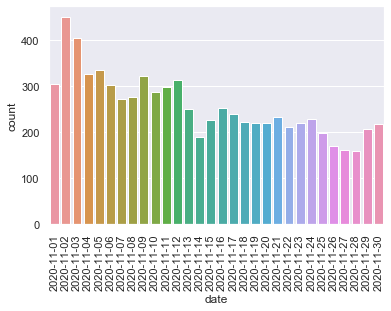

In [19]:
sns.set_theme()

sns.countplot(x="date", data=tweets_df)
plt.xticks(rotation=90)

plt.savefig("./graphs/maps_count.png", bbox_inches = 'tight')

### language

In [6]:
tweets_df['language'].unique()

array(['es', 'en', 'fr', 'und', 'de', 'ru', 'lt', 'lv', 'no', 'tr', 'in',
       'nl', 'pt', 'ja', 'et', 'ro', 'ca', 'ht', 'tl', 'pl', 'sv', 'da',
       'it', 'bg', 'fi', 'eu', 'ar', 'vi', 'cy', 'ko', 'is', 'uk'],
      dtype=object)

In [7]:
len(tweets_df['language'].unique())

32

In [8]:
tweets_df[['tweet_id', 'language']].groupby(['language']).agg(['count'])

,tweet_id
,count
language,
ar,3
bg,1
ca,38
cy,1
da,6
de,17
en,6245
es,601


### users

In [9]:
user_loc = tweets_df[['user_loc', 'user_id', 'user']].drop_duplicates(['user_id'])
user_loc

,user_loc,user_id,user
0,NaN,1002117891133755392,JoseFMolano
1,México,384907052,Letyludigital
2,Minnesota,704329847896678400,RealRossThorn
3,"Newcastle Upon Tyne, England",863722747,TimRodaway
4,"Auvergne, France",3641471067,BertrandHoud
...,...,...,...
7641,"HOUSE 3, ADEBAJO STREET, KONGI",4103886347,eagles_orbit
7660,"Pune, India",989327833594916864,ParinaazSood
7671,Paris,84597815,rhizome66
7689,NaN,1322892796991295489,BecViv


### location

In [ ]:
# method1

In [1]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# geolocator = Nominatim(user_agent="30daymapchallenge")

# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

# user_loc['coord'] = user_loc.user_loc.apply(geocode).apply(lambda location: (location.latitude, location.longitude))
# user_loc

In [2]:
# method2

In [3]:
# from geopy.geocoders import Nominatim

# def geocoder_lat(address):
#     geolocator = Nominatim(user_agent="30daymapchallenge")
#     location = geolocator.geocode(address)
#     if location:
#         return location.latitude

# def geocoder_lon(address):
#     geolocator = Nominatim(user_agent="30daymapchallenge")
#     location = geolocator.geocode(address)
#     if location:
#         return location.longitude
# # print(location.address)
# # print((location.latitude, location.longitude))
# # print(location.raw)

In [4]:
# user_loc['geo_lat'] = user_loc.user_loc.apply(geocoder_lat)
# user_loc['geo_lon'] = user_loc.user_loc.apply(geocoder_lon)
# user_loc

### merge and save

In [ ]:
df = pd.merge(tweets_df, user_loc, left_on=['user_id'])
df

In [ ]:
df.to_csv('/data/all.csv', index=False)

## Download Image

In [27]:
import requests

def url_download(df):
    for index, row in df.iterrows():
        print(row['date'], row['tweet_id'], row['media'])
        with open("./maps/origin/{}_{}.jpg".format(row['date'], row['tweet_id']), 'wb') as f:
            f.write(requests.get(row['media']).content)

In [30]:
## Resize Image

In [40]:
# url_download(tweets_df[1:10])
url_download(tweets_df)

2020-11-01 1323046291367100416 http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg
2020-11-01 1323043516629614595 http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg
2020-11-01 1323042272146034689 http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg
2020-11-01 1323042145255698449 http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg
2020-11-01 1323042144479793157 http://pbs.twimg.com/media/Elxj0WPWMAAz8BF.jpg
2020-11-01 1323042134744858626 http://pbs.twimg.com/media/ElxjIGVX0AA_H5P.jpg
2020-11-01 1323041898215473152 http://pbs.twimg.com/media/ElxjXr3WMAENeaf.jpg
2020-11-01 1323041095232720898 http://pbs.twimg.com/media/ElxixB3XYAEr3pD.jpg
2020-11-01 1323039442844721153 http://pbs.twimg.com/media/ElxhMwyW0AcaBXY.jpg


In [57]:


# # def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
# #     x, y = im.size
# #     size = max(min_size, x, y)
# #     new_im = Image.new('RGBA', (size, size), fill_color)
# #     new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
# #     return new_im

# for item in dirs:
#     if os.path.isfile(path+item):
#         im = Image.open(path+item)
#         x, y = im.size
#         size = max(256, x, y)
# #         new_im = im.resize((200,200), Image.ANTIALIAS)
#         new_im = Image.new('RGB', (size, size), (0, 0, 0, 0))
#         new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
#         f, e = os.path.splitext(path+item)
# #         imResize = im.resize((200,200), Image.ANTIALIAS)
#         new_im.save(f + '_resized.jpg', 'JPEG', quality=45)